# background

BOCI (bakso aci) is a typical meatball made by starch. What make it interesting is not the _boci_ itself, it is because there are a lot of meatball types in one bowl but the name of the menu is _boci_. In Indonesia, there are lots of street seller tries to sell _boci_, especially in West Java and Jakarta. Because its popularity, one of my friends try to make profit of it by selling boci.

When I ask, how much do you earn per day? he said, "Not sure to answer it. Sometimes 60, sometimes 70, sometimes 85 when the street is crowded."

"And how do you choose how many portion do you prepare per day?" I asked.

"I cannot answer it. Everyday I take IDR100K for my daily meals. And the rest of it is the capital for the next day."

He sells _boci_ from monday to friday. He works as a freelancer on weekends.

After discussion, I asked him to record the sales everyday for 90 days and include whether it is monday or else. I asked him also to see if the day he sells is raining or not. I have an intuition that there is something when it is raining. After 90 days, he gives me what he noted when he sold his _boci_.

disclaimer: _this data is a full fake dataset. this dataset is build using numpy random distribution generator for educational purpose only._

# library and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as s

In [2]:
dataset = pd.read_csv('penjualan_boci.csv')
dataset.drop(dataset.columns[0], axis=1, inplace=True)
dataset.head()

,date,weather,day,sales
0,2024-01-01,sunny,Monday,79.0
1,2024-01-02,rainy,Tuesday,80.0
2,2024-01-03,rainy,Wednesday,84.0
3,2024-01-04,rainy,Thursday,78.0
4,2024-01-05,sunny,Friday,83.0


# data cleaning

In [3]:
dataset.isna().sum()

date       0
weather    0
day        0
sales      0
dtype: int64

there is no missing data. so we can continue.

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     90 non-null     object 
 1   weather  90 non-null     object 
 2   day      90 non-null     object 
 3   sales    90 non-null     float64
dtypes: float64(1), object(3)
memory usage: 2.9+ KB


the column date is till object. it's better to convert into date and make it into our index.

In [5]:
dataset.index = pd.to_datetime(dataset.date)
dataset = dataset.drop(['date'], axis=1)
dataset.head()

,weather,day,sales
date,,,
2024-01-01,sunny,Monday,79.0
2024-01-02,rainy,Tuesday,80.0
2024-01-03,rainy,Wednesday,84.0
2024-01-04,rainy,Thursday,78.0
2024-01-05,sunny,Friday,83.0


it's nice now. let's find something interesting!

# exploration data analysis

## coding

In [6]:
print(dataset['weather'].describe())

count        90
unique        2
top       rainy
freq         46
Name: weather, dtype: object


there are 90 records with two unique values. rain appears frequently 46 times.

In [7]:
print(dataset['day'].describe())

count         90
unique         5
top       Monday
freq          18
Name: day, dtype: object


i guess it is not relevant since he did not have off day.

In [8]:
print(dataset['sales'].describe().round(3))

count    90.000
mean     79.311
std       5.335
min      68.000
25%      76.000
50%      79.000
75%      83.000
max      92.000
Name: sales, dtype: float64


so far, he can make it 68 portion or more per day. that is nice. the biggest achievement for him is selling 92 portion in a day. the 50% of sales lies between 76 and 83. the average is 79 and the center of sales lie on 79. i have a feeling that this sales follows gaussian distribution.

let's visualize using boxplot to understand the data easily.

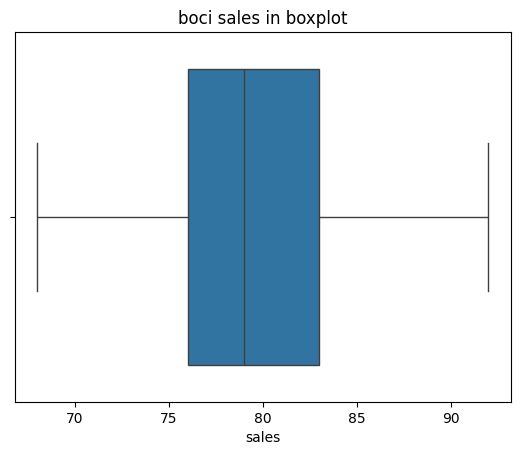

In [9]:
sns.boxplot(x=dataset.sales)
plt.title('boci sales in boxplot')
plt.show()

from the viz, we can see that the 50% of the data lies on the blue square.

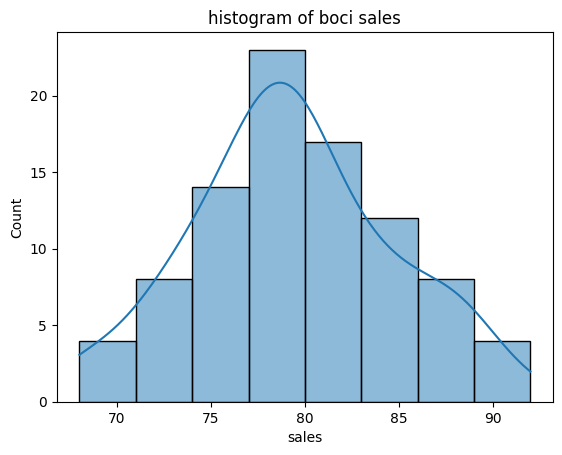

In [10]:
sns.histplot(dataset.sales, kde=True)
plt.title('histogram of boci sales')
plt.show()

outliers are data values which are extremely far from data distributin. there are two ways to see if there are otliers:
1. from boxplot iqr
2. from $3*std$ from the mean

In [11]:
min_value = dataset['sales'].min()
max_value = dataset['sales'].max()
std_value = dataset['sales'].std()
mean_value = dataset['sales'].mean()
q3 = np.percentile(dataset['sales'], 75)
q1 = np.percentile(dataset['sales'], 25)
iqr = q3-q1

In [12]:
iqr_min_threshold = q1-(1.5*iqr)
iqr_max_threshold = q3+(1.5*iqr)
std_min_threshold = mean_value-(std_value*3)
std_max_threshold = mean_value+(std_value*3)

In [13]:
def outliers_detection(value, threshold, check):
    if check == 'min':
        if value < threshold:
            print(f"there is ouliers detected in {check} value")
        else:
            print(f"there is no ouliers detected in {check} value")
    elif check == 'max':
        if value > threshold:
            print(f"there is ouliers detected in {check} value")
        else:
            print(f"there is no ouliers detected in {check} value")

print('outliers from iqr')
outliers_detection(min_value, iqr_min_threshold, check='min')
outliers_detection(max_value, iqr_max_threshold, check='max')
print("")
print('outliers from std')
outliers_detection(min_value, std_min_threshold, check='min')
outliers_detection(min_value, std_max_threshold, check='max')

it means that there is no data values extremely different from the distribution.

In [14]:
mean, var, std = s.bayes_mvs(data=dataset['sales'], alpha=0.95)
s.bayes_mvs(data=dataset['sales'], alpha=0.95)

(Mean(statistic=79.31111111111112, minmax=(78.19368372079686, 80.42853850142538)),
 Variance(statistic=29.118263090676876, minmax=(21.65406291572004, 39.09796977378829)),
 Std_dev(statistic=5.380650553108442, minmax=(4.653392624281777, 6.252836938045665)))

## findings

In [15]:
print(f"based on boxplot, 50% of sales lies between {q1} and {q3}.")

based on boxplot, 50% of sales lies between 76.0 and 83.0.


In [16]:
print(f"based on empirical rule, 68% of sales lies between {mean_value-std_value} and {mean_value+std_value}.")

based on empirical rule, 68% of sales lies between 73.97595224750873 and 84.6462699747135.


so now he understands how many portion he can prepare everyday.

In [17]:
print(f"after 90 days of selling, he can describe that the average of selling boci is {mean_value}.")
print(f"and he is 95% confident that when he collects more data, the average will lie between {mean[1][0]} and {mean[1][1]}.")

after 90 days of selling, he can describe that the average of selling boci is 79.31111111111112.
and he is 95% confident that when he collects more data, the average will lie between 78.19368372079686 and 80.42853850142538.


# hypothesis testing

Bogor, Indonesia is famous with the rain. it's the reason Bogor is called rain city. when the rain comes, I always try to find gravy food and _boci_ is one of them. so I think that there is the difference between rainy and sunny to _boci_ sales. let's conduct our a/b testing.

let's declare the hypothesis.

$mathematical:$

$H_0: \mu_0 = \mu_1$

$H_1: \mu_0 \neq \mu_1$

$conceptual:$

$H_0:$ there is no significant difference between a and b.

$H_1:$ there is significant difference between a and b.

## assumption check


to conduct a/b testing, I need to make sure this dataset follows this assumptions.
1. [ ] dataset should be numeric.
2. [ ] there are two groups to compare.
3. [ ] the samples are independent.
4. [ ] the data are normally distributed. if not, try mann whitney-u.
5. [ ] the data has equal variance.

In [18]:
dataset['sales'].info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 90 entries, 2024-01-01 to 2024-05-03
Series name: sales
Non-Null Count  Dtype  
--------------  -----  
90 non-null     float64
dtypes: float64(1)
memory usage: 1.4 KB


we can see that the type of our dependent is float, which means numeric.
1. [x] dataset should be numeric.

In [19]:
rainy = dataset[dataset['weather'] == 'rainy']['sales']
sunny = dataset[dataset['weather'] == 'sunny']['sales']

I already seperate them into two groups: rainy and sunny.

2. [x] there are two groups to compare.

In [20]:
dataset.index.has_duplicates

False

the data is not duplicated. it means he never recorded twice the same day. we can say that the sales values are independent.

3. [x] the samples are independent.

In [21]:
def gaussian_check(array):
    stat, p = s.shapiro(array)
    if p > 0.05:
        print(f"the data is normally distributed with p-value {p}.")
    else:
        print(f"the data is not normally distributed with p-value {p}.")

In [22]:
gaussian_check(sunny)
gaussian_check(rainy)

the data is normally distributed with p-value 0.11649153579437865.
the data is normally distributed with p-value 0.3865662022104624.


if the p-value is smaller than $0.05$, we can reject gaussian. our p-values are bigger than $0.05$. it means we failed to reject gaussian. so, our data are normally distributed.

4. [x] the data are normally distributed. if not, try mann whitney-u.

In [23]:
def variance_check(array_1, array_2):
    stat, p = s.levene(array_1, array_2)
    if p > 0.05:
        print(f"the data has equal variance with p-value {p}.")
    else:
        print(f"the data violates equal variance with p-value {p}.")

In [24]:
variance_check(sunny, rainy)

the data has equal variance with p-value 0.2188004442901671.


if the p-value is smaller than $0.05$, we can reject equal variance. our p-value is bigger than $0.05$ which means we failed to reject equal variance. so, our data has equal variance.

5. [x] the data has equal variance.

## primary analysis

In [25]:
stat, p = s.ttest_ind(rainy, sunny)

In [26]:
if p > 0.05:
    print(f"there is no significant difference between rainy and sunny with p-value {p}.")
else:
    print(f"there is significant difference between rainy and sunny with p-value {p}.")

there is significant difference between rainy and sunny with p-value 8.08519982507261e-06.


we can see that there is significant difference between rainy and sunny. I asked my friend to record whether the day is raining or not because I have an intuition that sales are bigger when day is raining. so we can conduct one sided testing.

to conduct one-tail a/b testing, we use this equation:

$H_0: \mu_0 \le \mu_1$

$H_1: \mu_0 \gt \mu_1$

in conceptual:

$H_0:$ rainy performs sales less or equal to sunny.

$H_1:$ rainy performs sales greater than sunny.

In [27]:
stat, p = s.ttest_ind(rainy, sunny, alternative='greater')

In [29]:
if p > 0.05:
    print(f"we fail to reject that he has more sales when the weather is sunny than rainy with p-value {p}.")
else:
    print(f"we reject that he has more sales when the weather is sunny than rainy with p-value {p}.")

we reject that he has more sales when the weather is sunny than rainy with p-value 4.042599912536305e-06.


this is confusing. I know it but bear with me. I'll try to explain carefully so we can digest easily.

it is easy to understand that my alternative hypothesis says that $H_1: \mu_0 \gt \mu_1$ or rainy perform more sales than sunny. we can see that the p-value is extremely close to zero which means very often that if p-value is extremely close to zero, therefore we reject the null hypothesis. in other word, we reject that he has more sales when the weather is sunny than rainy with p-value $4.042599912536305e-06$.




but why the concept are different from the script?

the key is in the python script `stat, p = s.ttest_ind(rainy, sunny, alternative='greater')`.

we see that the alternative parameter has argument 'greater'. it means that we have to adjust the alternative hypothesis or $H_1$ similar to argument needed. the python function is first variable is rainy, second variable is sunny, and the alternative is greater. the null hypothesis becomes `rainy is less or equal to sunny`.

it is easier for me to write like this:

~~~python
if p > 0.05: # fail to reject null hypothesis
    print(f"rainy performs less or equal to sunny with p-value {p}.")
else: # reject null hyphotesis
    print(f"rainy performs greater than sunny with p-value {p}.")
~~~

but I have to write either reject null hypothesis or fail to reject null hyphotesis.

what we need to understand is failing to reject that he has more sales when the weather is sunny than rainy ***equals to*** rainy performs less or equal to sunny. 

we reject that he has more sales when the weather is sunny than rainy ***equals to*** rainy performs greater than sunny.

In [33]:
rainy_mean = rainy.mean()
sunny_mean = sunny.mean()

now he knows, statistically, when the day is raining, he can sell _boci_ more.

In [34]:
print('it is statistically significant that rainy performs more sales than sunny.')
print(f"the average sales when it is rainy: {rainy_mean}.")
print(f"the average sales when it is sunny: {sunny_mean}.")

it is statistically significant that rainy performs more sales than sunny.
the average sales when it is rainy: 81.65217391304348.
the average sales when it is sunny: 76.86363636363636.
